In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_grades = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\student grades FE.csv")
df_grades.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_11196\2415457720.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_grades = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\student grades FE.csv")


,student_ID,first_name,last_name,grade_avg,faculty,tuition,OH_participated,classes_skipped
0,20123456,John,Park,B,Arts,44191,0,5
1,20123457,Alex,Great,B,Science,32245,4,10
2,20123458,Sebastian,Taylor,B,Business,42679,6,7
3,20123459,Michael,Bay,A,Math,46478,15,2
4,20123460,Scott,Foster,A,Engineering,36784,5,8


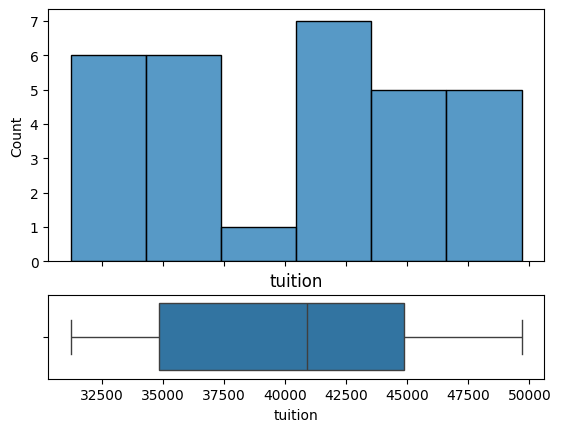

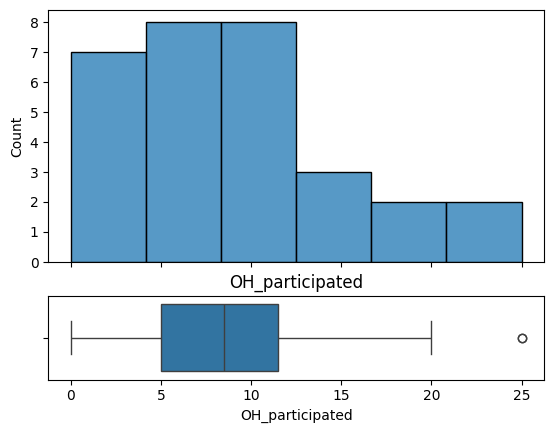

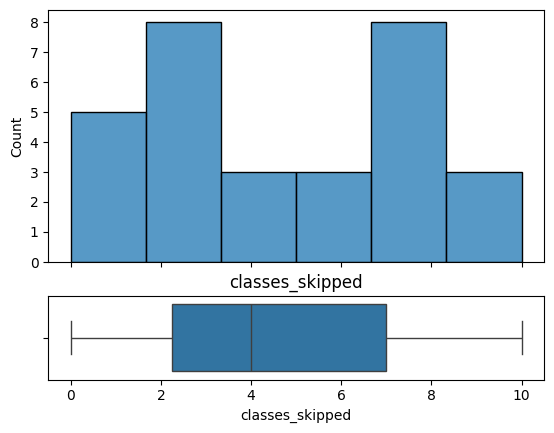

In [3]:
outlier_cols = ['tuition', 'OH_participated', 'classes_skipped']
 
for feature in outlier_cols:
    fig, (hist, box) = plt.subplots(2, 1,sharex=True,gridspec_kw={'height_ratios': [3, 1]})
    plt.title(feature)
    sns.histplot(df_grades[feature],ax=hist)
    sns.boxplot(data=df_grades[feature],orient='h',ax=box)

### We have an outlier in OH_Participated. We can either ignore it or fix it
### Using iqr rule can be better for the long term
### The Upper wisker is calculated using 
- 75% + 1.5 * IQR
### Lower wisker as
- 25% + 1.5 * IQR

In [5]:
q1 = np.percentile(df_grades['OH_participated'], 25)
q3 = np.percentile(df_grades['OH_participated'], 75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

df_grades_removeout = df_grades[df_grades['OH_participated'] <= upper_limit]
df_grades_removeout.head()

,student_ID,first_name,last_name,grade_avg,faculty,tuition,OH_participated,classes_skipped
0,20123456,John,Park,B,Arts,44191,0,5
1,20123457,Alex,Great,B,Science,32245,4,10
2,20123458,Sebastian,Taylor,B,Business,42679,6,7
3,20123459,Michael,Bay,A,Math,46478,15,2
4,20123460,Scott,Foster,A,Engineering,36784,5,8


### If some schools allow participation above 20 hours so we will need to modify the OH_participated

In [8]:
df_grades_modify = df_grades.copy()
df_grades_modify.loc[df_grades['OH_participated'] > 20, 'OH_participated'] = 20
df_grades_modify.head()

,student_ID,first_name,last_name,grade_avg,faculty,tuition,OH_participated,classes_skipped
0,20123456,John,Park,B,Arts,44191,0,5
1,20123457,Alex,Great,B,Science,32245,4,10
2,20123458,Sebastian,Taylor,B,Business,42679,6,7
3,20123459,Michael,Bay,A,Math,46478,15,2
4,20123460,Scott,Foster,A,Engineering,36784,5,8


## Exercise

In [9]:
df_basketball = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\Basketball_stats.csv")
df_basketball.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_11196\859219848.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_basketball = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\Basketball_stats.csv")


,first_name,last_name,points_per_game,reb_per_game,assist_per_game,3pt_per_game,steals_per_game,blocks_per_game,position
0,Stephen,Larry,25,4,3,7,1.8,0.2,PG
1,Lebron,Games,30,12,11,3,1.3,1.0,SF
2,Grayson,Ballen,10,3,2,2,0.9,0.2,SG
3,Luke,Dontik,35,9,10,4,0.8,0.6,PG
4,Lonjo,Tall,7,6,10,2,1.5,0.6,PG


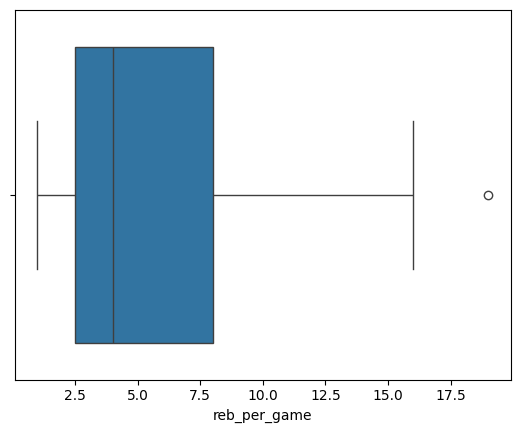

In [12]:
sns.boxplot(data = df_basketball, x = 'reb_per_game', orient='h')
plt.show()

### Using Binning to simplify data so that the model does not focus on noise

In [17]:
df_bball = df_basketball.copy()
df_bball['position'].value_counts()

position
SG    22
PG    21
C     13
SF    12
PF    11
Name: count, dtype: int64

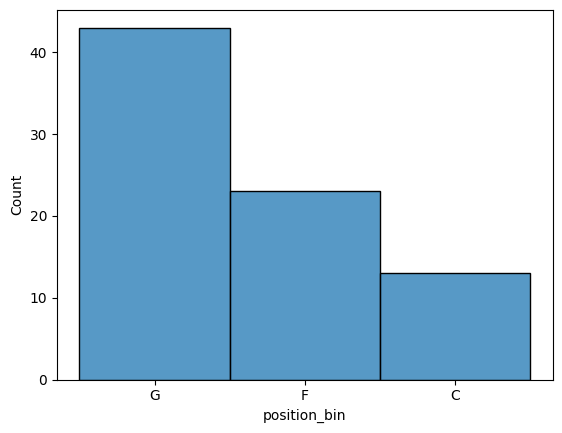

In [19]:
df_bball['position_bin'] = df_bball['position'].map({'SG' : 'G',
                                                                   'PG': 'G',
                                                                   'SF' : 'F',
                                                                   'PF' : 'F',
                                                                   'C': 'C'})

sns.histplot(df_bball['position_bin'])
plt.show()

### Binning using another dataset

In [20]:
df_house = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\kc_house_data.csv")
df_house.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_11196\2982456935.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_house = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\kc_house_data.csv")


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15neighbors,sqft_lot_15neighbors
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- Our target is the price column

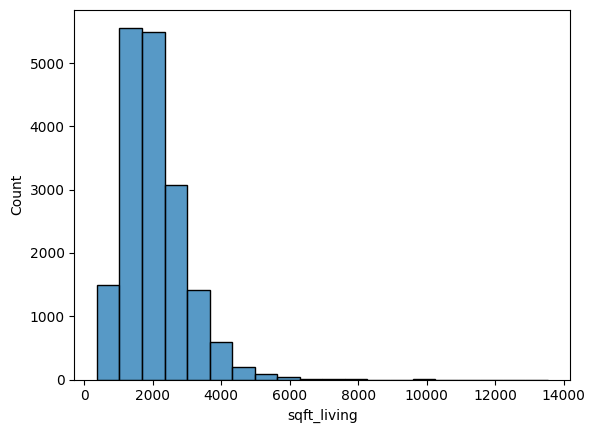

In [21]:
# Plot the distribution of the sqft_living column
sns.histplot(data = df_house, x = 'sqft_living', bins = 20)
plt.show()

In [23]:
# Now to save the above data first define the labels
lables = ['small', 'medium', 'large']

df_house['sqft_bins'] = pd.cut(df_house['sqft_living'], bins = 3, labels = lables)
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15neighbors,sqft_lot_15neighbors,sqft_bins
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,small
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,small
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,small
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,small
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,small


In [ ]:
# The problem is that the values varry alot. It is right skewed
df_house['sqft_bins'].value_counts()

sqft_bins
small     17794
medium      198
large         6
Name: count, dtype: int64

In [25]:
# The disparity needs to be changed. We can use pandas qcut to ensure the frequency of the bins
df_house['sqft_bins_freq'] = pd.qcut(df_house['sqft_living'], q = 3, labels = lables)
df_house['sqft_bins_freq'].value_counts()

sqft_bins_freq
small     6012
medium    5998
large     5988
Name: count, dtype: int64

### The data can be binned like this according to the need of the researcher or the client

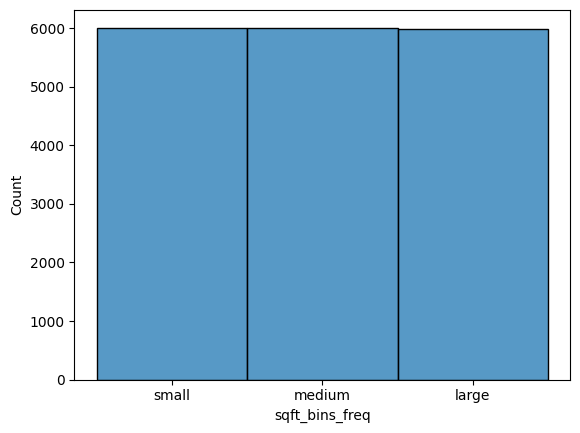

In [26]:
sns.histplot(data = df_house, x = 'sqft_bins_freq')
plt.show()

In [28]:
# Now we can create bins on domain knowledge, the client says that the values change at 2000, and 5000 sqft.
df_house['sqft_bin_manual'] = pd.cut(df_house['sqft_living'], [1,2000,5000,20000], labels = lables)
df_house['sqft_bin_manual'].value_counts()

sqft_bin_manual
small     9935
medium    7901
large      162
Name: count, dtype: int64

### Now to apply the bins to the testing data we can change the code a little bit

In [31]:
# Now we can create bins on domain knowledge, the client says that the values change at 2000, and 5000 sqft.
df_house['sqft_bin_manual'], training_bins = pd.cut(df_house['sqft_living'], [1,2000,5000,20000], labels = lables, retbins = True)
df_house['sqft_bin_manual'].value_counts()

sqft_bin_manual
small     9935
medium    7901
large      162
Name: count, dtype: int64

In [32]:
df_house_test = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\kc_house_data_test.csv")
df_house_test.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_11196\3344112843.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_house_test = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\kc_house_data_test.csv")


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15neighbors,sqft_lot_15neighbors
0,2892600056,20150106T000000,216000.0,2,1.00,1130,12500,1.0,0,0,...,7,1130,0,1953,0,98055,47.4514,-122.187,1270,10798
1,3396800120,20150427T000000,540000.0,3,2.50,2180,11100,1.0,0,0,...,8,1230,950,1983,0,98052,47.7170,-122.101,1930,12000
2,2320069089,20140930T000000,212000.0,3,1.50,1830,12233,1.5,0,0,...,5,1830,0,1930,0,98022,47.2057,-122.003,1520,12233
3,4036400110,20150129T000000,300000.0,3,2.75,2340,12282,1.0,0,2,...,8,1470,870,1978,0,98155,47.7379,-122.289,2640,8887
4,7518506716,20140827T000000,969950.0,3,2.50,2830,3750,3.0,0,0,...,10,2830,0,2014,0,98117,47.6798,-122.385,1780,5100


In [34]:
df_house_test['sqft_bin_manual'] = pd.cut(df_house_test['sqft_living'], bins = training_bins, labels = lables)
df_house_test['sqft_bin_manual'].value_counts()

sqft_bin_manual
medium    1789
small     1777
large       49
Name: count, dtype: int64

### Using Smooth binning

In [36]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15neighbors,sqft_lot_15neighbors,sqft_bins,sqft_bins_freq,sqft_bin_manual
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,small,small,small
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,small,large,medium
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,small,small,small
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,small,medium,small
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,small,medium,small


In [40]:
sqft_bin_mean = df_house.groupby('sqft_bin_manual')['sqft_living'].mean()
sqft_bin_mean

C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_11196\1222839785.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sqft_bin_mean = df_house.groupby('sqft_bin_manual')['sqft_living'].mean()


sqft_bin_manual
small     1436.107599
medium    2744.651310
large     6027.166667
Name: sqft_living, dtype: float64

In [41]:
# Assign the new value based on the bin average
df_house['sqft_bin_manual_smooth'] = sqft_bin_mean.loc[df_house['sqft_bin_manual']].reset_index(drop = True)
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living_15neighbors,sqft_lot_15neighbors,sqft_bins,sqft_bins_freq,sqft_bin_manual,sqft_bin_manual_smooth
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,small,small,small,1436.107599
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,small,large,medium,2744.651310
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,small,small,small,1436.107599
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,small,medium,small,1436.107599
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,small,medium,small,1436.107599


### Exercise

In [4]:
df_dunk = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\dunk_data.csv")
df_dunk.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_17224\838441688.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_dunk = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\dunk_data.csv")


,height,weight,jump,athleticism,flex_score,dunk
0,194,85,41,16,56,1
1,206,88,35,28,79,1
2,188,71,44,77,35,1
3,183,96,43,70,24,1
4,181,89,20,76,86,0


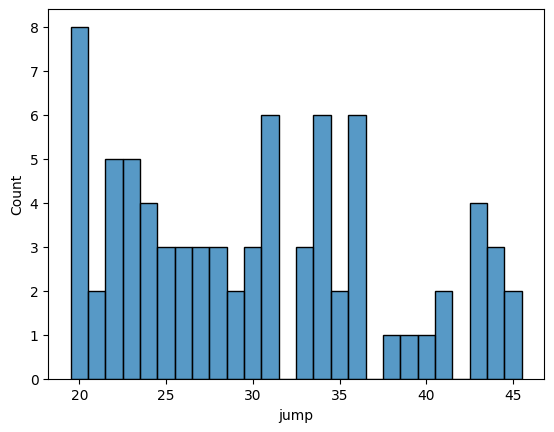

In [15]:
sns.histplot(data = df_dunk, x = 'jump', discrete = True)
plt.show()

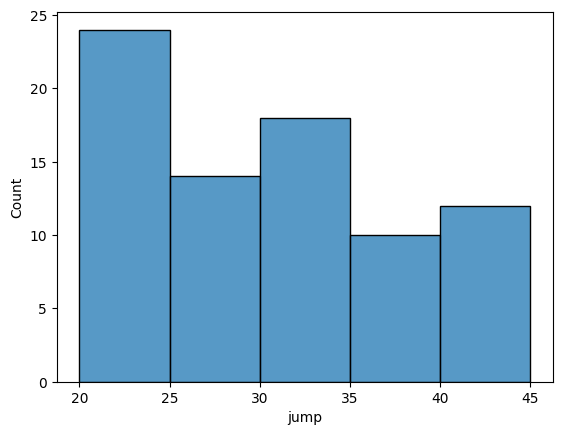

In [8]:
sns.histplot(df_dunk['jump'], bins = 5)
plt.show()

In [11]:
# Apply binning to the height column
labels = ['tall', 'vtall']
df_dunk['height_bin'], train_bins = pd.cut(df_dunk['height'],
                                           [1, 200, 300],
                                           labels = labels,
                                           retbins = True)
df_dunk.head()

,height,weight,jump,athleticism,flex_score,dunk,height_bin
0,194,85,41,16,56,1,tall
1,206,88,35,28,79,1,vtall
2,188,71,44,77,35,1,tall
3,183,96,43,70,24,1,tall
4,181,89,20,76,86,0,tall


In [12]:
# Test the binning in test dataset
df_dunk_test = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\dunk_data_test.csv")
df_dunk_test.head()

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_17224\1216338679.py:2: SyntaxWarning: invalid escape sequence '\C'
  df_dunk_test = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\dunk_data_test.csv")


,height,weight,jump,athleticism,flex_score,dunk
0,207,73,35,76,83,1
1,203,92,21,10,68,0
2,184,103,27,74,66,0
3,196,110,20,86,49,0
4,202,82,31,62,60,1


In [13]:
df_dunk_test['height_bin'] = pd.cut(df_dunk_test['height'],
                                    train_bins,
                                    labels = labels)
df_dunk_test.head()

,height,weight,jump,athleticism,flex_score,dunk,height_bin
0,207,73,35,76,83,1,vtall
1,203,92,21,10,68,0,vtall
2,184,103,27,74,66,0,tall
3,196,110,20,86,49,0,tall
4,202,82,31,62,60,1,vtall


### How binning destroys predictive data

In [17]:
data_df = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\\binning_for_target.csv")
data_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_17224\2955194698.py:1: SyntaxWarning: invalid escape sequence '\C'
  data_df = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\\binning_for_target.csv")


,input,target,bins
0,1,A,1 & 2
1,2,A,1 & 2
2,3,A,3 & 4
3,3,A,3 & 4
4,4,A,3 & 4


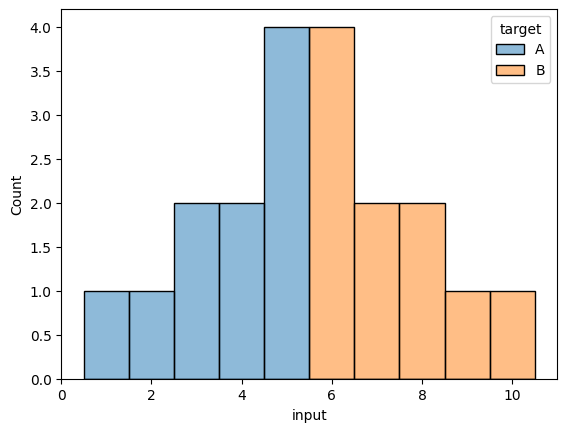

In [19]:
sns.histplot(data = data_df, x = 'input',discrete = True, hue = 'target')
plt.show()

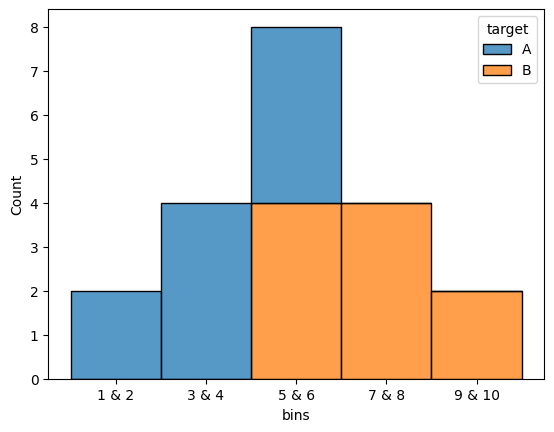

In [20]:
# if the data is binned at 5 and 6 then that predictive power is lost
sns.histplot(data = data_df, x = 'bins', discrete = True, hue = 'target', multiple = 'stack')
plt.show()